In [1]:
import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Synthetic data generation

In [3]:
import warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")

In [4]:
import pandas as pd

## Load transactions

In [5]:
data = pd.read_csv('data/uci/wine_quality.csv')
data.head(10)

,variant,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data, test = train_test_split(data, test_size=0.2, random_state=42)

## Train model and synthesize data

In [8]:
from synthesized.core import BasicSynthesizer

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


In [9]:
with BasicSynthesizer(data=data) as synthesizer:
    synthesizer.learn(data=data, verbose=5000)
    synthesized = synthesizer.synthesize(n=10000)

value types:
variant categorical
fixed acidity continuous
volatile acidity continuous
citric acid continuous
residual sugar continuous
chlorides continuous
free sulfur dioxide continuous
total sulfur dioxide continuous
density continuous
pH continuous
sulphates continuous
alcohol continuous
quality categorical
5000: 2.40e+01
10000: 1.14e+01
15000: 5.18e+01
20000: 1.01e+01
25000: 1.15e+01
30000: 9.00e+00
35000: 6.05e+00
40000: 5.28e+00
45000: 4.51e+00
50000: 1.60e+01


## Display synthesized data

In [10]:
synthesized.head(5)

,variant,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.580542,0.517548,0.156555,4.391266,0.113122,31.037701,69.791954,0.999212,3.129555,0.526857,6.391541,4
1,red,8.794650,1.052084,0.209573,9.636714,0.259405,42.645363,97.120850,1.008052,3.769982,1.092911,8.036119,3
2,white,4.607294,0.256623,0.111773,10.777539,0.042122,50.156387,78.683365,0.995287,3.224671,0.396207,9.826346,6
3,red,11.232560,0.290922,0.517125,2.788842,0.047862,37.679665,91.451637,0.996303,3.241235,0.646630,11.207506,7
4,red,6.480966,1.023696,0.161758,4.317038,0.100850,37.422600,73.144089,0.996972,2.986932,0.550334,9.182278,5


In [11]:
data.head(5)

,variant,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1916,white,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42,9.2,5
947,white,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0,5
877,white,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38,10.2,6
2927,white,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0,7
6063,red,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5


In [12]:
data = data.astype(synthesized.dtypes)

In [13]:
test = data.astype(synthesized.dtypes)

# Visualization of original and synthetic data

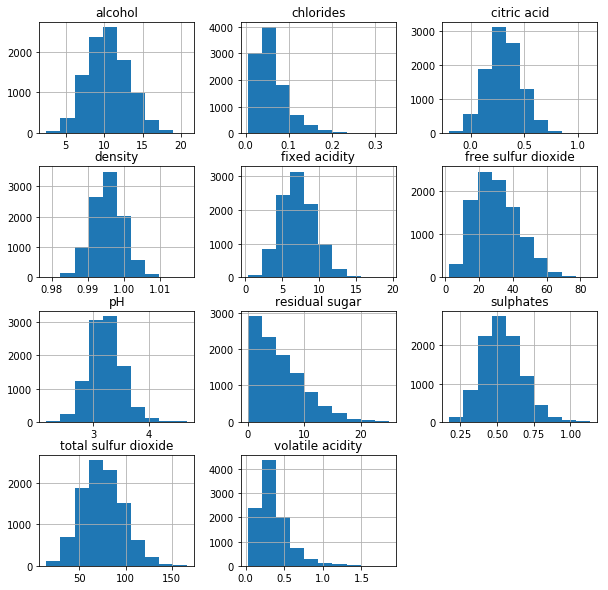

In [14]:
synthesized.hist(figsize=(10,10))
None

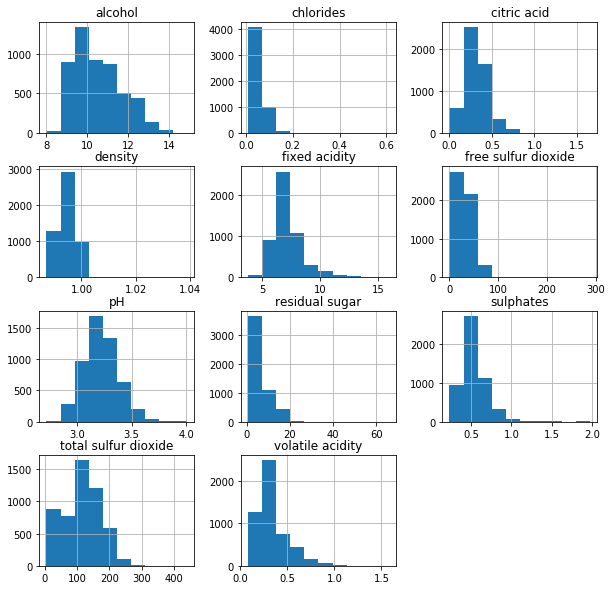

In [15]:
data.hist(figsize=(10, 10))
None

# Tests to confirm the utility of synthetic data 

In [16]:
from synthesized.testing import UtilityTesting, ColumnType
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [17]:
testing = UtilityTesting(synthesizer, data, test, synthesized)

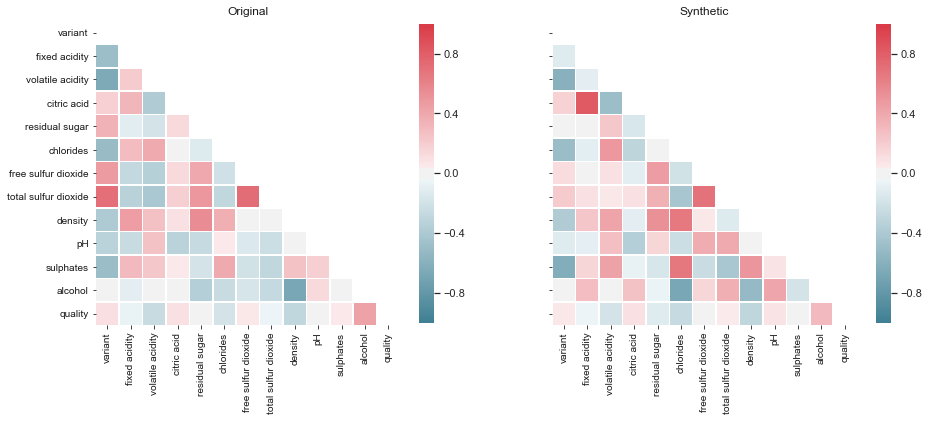

In [18]:
testing.show_corr_matrices()

In [19]:
testing.estimate_utility(classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor())

,target_column,estimator,dummy_original_score,original_score,synth_score,orig_error,synth_error,score_utility,error_utility
0,alcohol,DecisionTreeRegressor,0.000000e+00,0.999999,0.000000,0.000900,1.982451,0.000000,0.000454
1,alcohol (categorical reduction),DecisionTreeClassifier,2.563017e-01,1.000000,0.140466,0.000000,0.864922,0.000000,0.000000
2,chlorides,DecisionTreeRegressor,2.135395e-08,1.000000,0.298972,0.000019,0.028594,0.298972,0.000649
3,chlorides (categorical reduction),DecisionTreeClassifier,7.814124e-01,1.000000,0.829709,0.000000,0.231287,0.220951,0.000000
4,citric acid,DecisionTreeRegressor,0.000000e+00,1.000000,0.140351,0.000000,0.134823,0.140351,0.000000
5,citric acid (categorical reduction),DecisionTreeClassifier,4.820089e-01,1.000000,0.478930,0.000000,0.523764,0.000000,0.000000
6,density,DecisionTreeRegressor,0.000000e+00,0.993696,0.342738,0.000239,0.002431,0.344912,0.098169
7,density (categorical reduction),DecisionTreeClassifier,5.616702e-01,1.000000,0.626708,0.000000,0.389648,0.148376,0.000000
8,fixed acidity,DecisionTreeRegressor,0.000000e+00,0.997370,0.000000,0.067051,2.080112,0.000000,0.032234
9,fixed acidity (categorical reduction),DecisionTreeClassifier,4.966327e-01,0.999808,0.266500,0.000192,0.721570,0.000000,0.000267


In [20]:
testing.compare_marginal_distributions(target_column='quality', conditional_column='density')

,density,quality EMD
0,"[0.9871299862861633, 1.0000924915075302)",0.330182
1,"[1.0000924915075302, 1.013054996728897)",0.350345
2,"[1.013054996728897, 1.026017501950264)",inf
3,"[1.026017501950264, 1.0389800071716309)",inf


In [21]:
testing.compare_marginal_distributions(target_column='quality', conditional_column='variant')

,variant,quality EMD
0,"[0.0, 0.25)",0.298666
1,"[0.25, 0.5)",inf
2,"[0.5, 0.75)",inf
3,"[0.75, 1.0)",inf


In [22]:
testing.compare_marginal_distributions(target_column='sulphates', conditional_column='chlorides', bins=10)

,chlorides,sulphates EMD
0,"[0.008999999612569809, 0.06919999979436398)",0.018699
1,"[0.06919999979436398, 0.12939999997615814)",0.025638
2,"[0.12939999997615814, 0.1896000001579523)",0.173805
3,"[0.1896000001579523, 0.24980000033974648)",0.217482
4,"[0.24980000033974648, 0.31000000052154064)",0.243835
5,"[0.31000000052154064, 0.3702000007033348)",0.309000
6,"[0.3702000007033348, 0.430400000885129)",inf
7,"[0.430400000885129, 0.49060000106692314)",inf
8,"[0.49060000106692314, 0.5508000012487173)",inf
9,"[0.5508000012487173, 0.6110000014305115)",inf


# Tests to confirm the security of original data 

In [23]:
from synthesized.testing import LinkageAttackTesting, Column

## Focus on a small chunk of original data for demo purposes

In [24]:
data_orig_reduced = data.head(30000)

## Define schema for security checks

Each attribute in a dataset has the following properties to be specified by the user
1. "key_attribute" - whether the attribute can be available to the attacker as background knowledge 
2. "sensitive" - whether the attribute is SPI 
3. "categorical" - wtether the attribute is a categorical variable

In [25]:
schema = {
    'type': Column(key_attribute=False, sensitive=True, categorical=True),
    'operation': Column(key_attribute=True, sensitive=True, categorical=True),
    'amount': Column(key_attribute=True, sensitive=True, categorical=False),
    'account_id': Column(key_attribute=False, sensitive=False, categorical=False),
}

## Identify and demonstrate vulnerabilities in synthetic data

In [26]:
linkage = LinkageAttackTesting(data_orig_reduced, synthesized, schema)

In [27]:
attacks = linkage.identify_attacks()

KeyError: 'free sulfur dioxide'

In [30]:
len(attacks)

1293

In [31]:
show_attacked_data(data_orig_reduced, synthesized, attacks[3], schema)

attribute under attack:  operation

bacground knowledge:  amount


 original df subset: 
          account_id  type  operation  amount
73484         171.0     0          3    30.0
120253        284.0     0          3    30.0
539749       1425.0     0          3    30.0
11690          26.0     0          3    30.0
911137       3166.0     0          3    30.0
764169       2339.0     0          3    30.0
242623        590.0     0          3    30.0
541120       1429.0     0          3    30.0
360068        898.0     0          3    30.0
391445        986.0     0          3    30.0
26105          59.0     0          3    30.0
878330       2967.0     0          3    30.0
1042390      4281.0     0          3    30.0
332440        823.0     0          3    30.0
120343        284.0     0          3    30.0
503325       1311.0     0          3    30.0
698310       2021.0     0          3    30.0
1003457      3865.0     0          3    30.0
169893        406.0     0          3    30.0
570227    

## Clear the synthetic dataset from vulnerabilities

In [32]:
cleared_df = eradicate_attacks(data_orig_reduced, synthesized, attacks, schema)

remaining attacks :  1293


/Users/denisborovikov/IdeaProjects/synthesized/synthesized/testing/testing_environment.py:236: RuntimeWarning:

invalid value encountered in true_divide

/Users/denisborovikov/IdeaProjects/synthesized/synthesized/testing/testing_environment.py:235: RuntimeWarning:

invalid value encountered in true_divide



remaining attacks :  67
remaining attacks :  3


## Demonstrate the security of synthetic data

In [33]:
new_attacks = identify_attacks(data_orig_reduced, cleared_df, schema)

In [34]:
len(new_attacks)

0

## Demonstrate the utility of synthetic data cleared from all vulnerabilities

In [35]:
testing = Testing(data, cleared_df, synthesized, schema={
    'type': ColumnType.CATEGORICAL,
    'operation': ColumnType.CATEGORICAL,
    'amount': ColumnType.CONTINUOUS,
})

In [36]:
testing.estimate_utility(classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor())

,target_column,estimator,dummy_original_score,original_score,synth_score,orig_error,synth_error,score_utility,error_utility
0,amount,DecisionTreeRegressor,0.000000,0.000000,0.092009,14303.090350,8334.100440,0.000000,1.716213
1,amount (categorical reduction),DecisionTreeClassifier,0.105607,0.105607,0.511185,0.894393,0.488815,0.000000,1.829716
2,operation,DecisionTreeClassifier,0.017723,0.130763,0.401553,0.869237,0.598447,3.395535,1.452489
3,type,DecisionTreeClassifier,0.661488,0.355649,0.371179,0.644351,0.628649,NaN,1.024977


## Demonstrate the synthetic dataset to be released to the user

In [37]:
synthesized

,account_id,type,operation,amount
0,314,0,0,3482.375244
1,1068,0,3,12373.549805
2,629,1,0,7045.999023
3,15,0,3,9.458170
4,410,1,0,4617.419434
5,328,0,0,3623.130127
6,15,0,3,9.458170
7,477,0,3,5429.196289
8,15,0,3,9.458170
9,1435,0,3,16667.007812
